In [22]:
import cv2
import matplotlib.pyplot as plt

Read video from file and save the video into a serious of images

In [7]:
vidcap = cv2.VideoCapture('D:/2probe/change radius/inward/IMG_4856.mov')
success,image = vidcap.read()
count = 0
while success:
    cv2.imwrite("D:/2probe/change radius/inward/images/%d.jpg" % count, image)     # save frame as JPEG file      
    success,image = vidcap.read()
    count += 1
    if count>1174: break
print(count)


1175


photo labed No 30 is start of a cycle. t=0.  
photo labed No 1474 is middle of a cycle. t=T/2.
T=(770.32/8) s

In [8]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

pil_im = Image.open('D:/2probe/change radius/inward/images/32.jpg', 'r')
pil_im.show()

pil_im = Image.open('D:/2probe/change radius/inward/images/1474.jpg', 'r')
pil_im.show()

Because number of photo increase linearly with time, given number of photo we can get t.  
In No 30, edge to edge distance is 5.2 cm  
In No 1474, edge to edge distance is 1.25 cm  
Edge to edge distance decease linearly with time, so given number of photo we can get edge to edge distance in that photo

In [20]:
Dis_start=5.2
Dis_end=1.25
Photo_start=32
Photo_end=1474
T=(770.32/8)

In [21]:
#how many pionts in R curvature figure(T/2)?
No=5
photos=[Photo_start]
distances=[5.2]
times=[0.0]
for i in range(1,No+1):
    Photo=round((Photo_end-Photo_start)/5*i+Photo_start)
    photos.append(Photo)
    distances.append((Photo-Photo_start)/(Photo_end-Photo_start)*(Dis_end-Dis_start)+Dis_start)
    times.append(T/2*i/No)
print("Photo Number: ",photos)
print("Edge to edge distance: ",distances)
print("Time: ",times)

        

Photo Number:  [32, 320, 609, 897, 1186, 1474]
Edge to edge distance:  [5.2, 4.411095700416089, 3.6194521497919556, 2.8305478502080446, 2.0389042995839115, 1.25]
Time:  [0.0, 9.629000000000001, 19.258000000000003, 28.887, 38.516000000000005, 48.145]


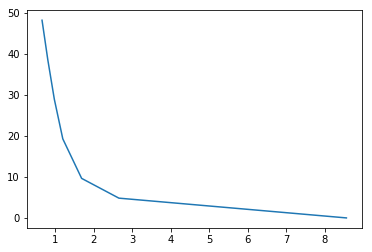

In [59]:
#measure Rc from photos, in cm
#add Photo 176 between photo 32 and photo 320
times=[0.0, 4.8145, 9.629, 19.258, 28.887, 38.516, 48.145]
Rc=[8.57,2.65, 1.68,1.19,0.97,0.80,0.65]
plt.plot(Rc,times)

In [60]:
temp=Rc[::-1][1:]
Rc_T=Rc+temp
Rc_2T=Rc_T+Rc_T[1:]
print("Radius of Curvature in TWO periods: ",Rc_2T)
for i in range(No,-1,-1):
    times.append(T-times[i])
time_2T=times
for i in range(1,len(times)):
    time_2T.append(times[i]+T)
print("Time axis in TWO periods: ",time_2T)

Radius of Curvature in TWO periods [8.57, 2.65, 1.68, 1.19, 0.97, 0.8, 0.65, 0.8, 0.97, 1.19, 1.68, 2.65, 8.57, 2.65, 1.68, 1.19, 0.97, 0.8, 0.65, 0.8, 0.97, 1.19, 1.68, 2.65, 8.57]
Time axis in TWO periods [0.0, 4.8145, 9.629, 19.258, 28.887, 38.516, 48.145, 57.77400000000001, 67.403, 77.03200000000001, 86.661, 91.47550000000001, 96.29, 101.1045, 105.91900000000001, 115.548, 125.177, 134.806, 144.435, 154.06400000000002, 163.693, 173.322, 182.95100000000002, 187.76550000000003, 192.58]


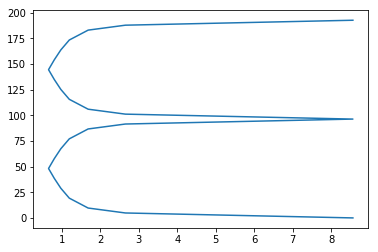

In [61]:
plt.plot(Rc_2T,time_2T)

Here we can relation between time and Rc(radius of Curvature). We also have relation of time vs R in origin file. We can now have a figure of R vs Rc 

In [63]:
import pandas as pd
df = pd.DataFrame({'Rc': Rc_2T, 'Time': time_2T}) 
df.to_csv('D:/2probe/change radius/Rc_vs_Time.csv', index = False)